# Plotting Lab

In the `datasets/` folder in this notebook you will find two datasets:

- `salary.csv` -- a dataset comparing salary data across gender and tenure lines for academics 
- `wine_quality.csv` -- a dataset comparing chemical qualities of red and white wine and user-rated quality scores (on a 10 point scale)

Your task is to use Matplotlib and Seaborn to create two, high-quality plots, one from each of these two datasets. Your deliverable for this lab is to share your plots in your market's slack channel at the end of the day. 

Part of effective data science work is to be able to take new datasets and investigate them for interesting correlations or relationships that might be the basis of future research or investigation. Take this lab as an opportunity to practice those skills and how plotting can help you in that goal!

##### Useful Workflow Tips

1. Open the data and do a quick EDA:
  - How many rows and columns?
  - Is there missing data?
  - What do each of the columns mean?
    - Sometimes it may not be clear at first glance so double check
    - Googling for some insight into that domain (such as salary information for the academic world) is not just highly encouraged, but may be 100% required in some cases
    - Consider checking in with your colleagues, classmates, and teachers
  - At first glance, are there columns that you think might have an interesting relationship
2. Begin plotting:
  - If a variable of interest is encoded as a string, do some feature extraction / transformation to turn it into numeric values
  - Use something like seaborn's pairplot to visualize overall relationships
  - Start digging into a bivariate relationship
3. Refine plots:
  - Try different plotting types / plotting options to create an accurate and interesting plot
  - Remember to include titles, axes labels, etc.
  - Does your plot have a story? What should a reader take away from your plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Salary

In [3]:
salary = pd.read_csv('datasets/salary.csv')
salary.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [11]:
salary['degree']=salary['dg'].str.contains('doctorate').astype(int)

In [15]:
salary['sex']=salary['sx'].str.contains('female').astype(int)

In [24]:
salary.head()

,sx,rk,yr,dg,yd,sl,degree,sex
0,male,full,25,doctorate,35,36350,1,0
1,male,full,13,doctorate,22,35350,1,0
2,male,full,10,doctorate,23,28200,1,0
3,female,full,7,doctorate,27,26775,1,1
4,male,full,19,masters,30,33696,0,0


In [8]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
sx    52 non-null object
rk    52 non-null object
yr    52 non-null int64
dg    52 non-null object
yd    52 non-null int64
sl    52 non-null int64
dtypes: int64(3), object(3)
memory usage: 2.5+ KB


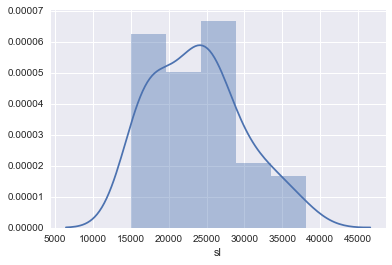

In [11]:
sns.distplot(salary['sl'])

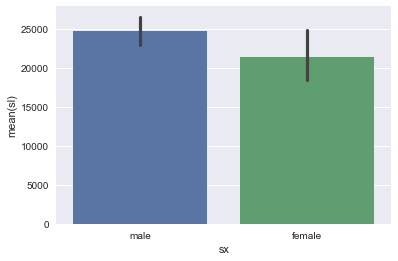

In [15]:
sns.barplot(x='sx',y='sl',data=salary)

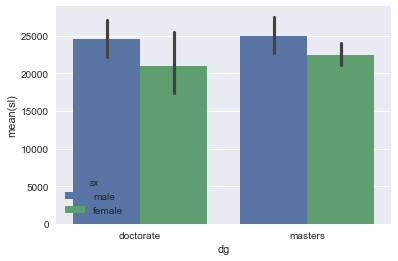

In [18]:
sns.barplot(x='dg',y='sl',hue='sx',data=salary)

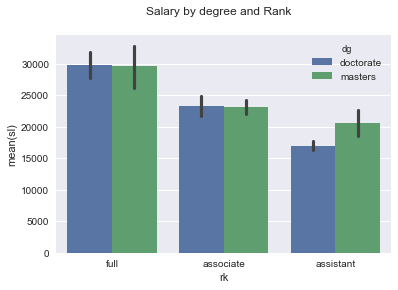

In [60]:
sns.plt.suptitle("Salary by degree and Rank")
sns.plt.ylabel('Salary')
sns.barplot(x='rk',y='sl',hue='dg',data=salary)

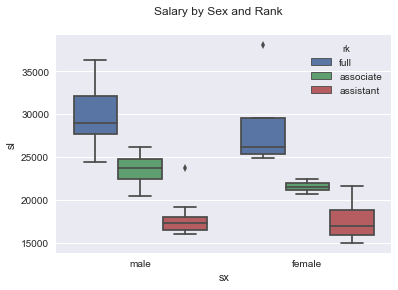

In [65]:
sns.plt.suptitle("Salary by Sex and Rank")
sns.boxplot(x='sx', y='sl', hue='rk', data=salary)

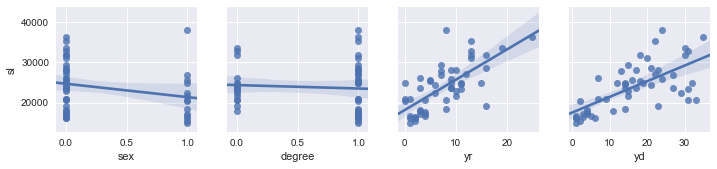

In [71]:
sns.pairplot(salary,x_vars=['sex','degree','yr','yd'],y_vars=['sl'],kind='reg')

In [25]:
import statsmodels.formula.api as sm

In [22]:
result = sm.ols(formula="sl ~ yr + yd + sex + degree", data=salary).fit()

In [20]:
print (result.params)

Intercept    13884.222885
yr             351.968574
yd             339.399039
sex          -1286.544321
degree        3299.348842
dtype: float64


In [21]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     sl   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     20.11
Date:                Tue, 10 Oct 2017   Prob (F-statistic):           1.05e-09
Time:                        16:25:47   Log-Likelihood:                -499.00
No. Observations:                  52   AIC:                             1008.
Df Residuals:                      47   BIC:                             1018.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.388e+04   1639.823      8.467      0.0

# Wine Quality

In [66]:
wine = pd.read_csv('datasets/wine_quality.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [67]:
corr=wine[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
          'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].corr()

In [68]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


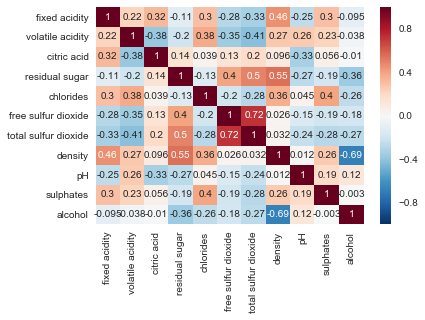

In [69]:
sns.heatmap(corr,annot=True)